In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from h5py import File


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
import json

# Load in Data

100
Readout length =  5000
Readout window =  [1400, 6200]
Digital atten =  -24
Readout freq =  7.78992


C:\Users\hek\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Single shot readout fidility from channel  I  =  0.4484
Single shot readout fidility from channel  Q  =  0.15974
---------------------------
Single shot readout fidility from channel  I  after rotation =  0.7691976919769198
Optimal angle = -0.3277241664255019
Single shot readout fidility from channel  Q  after rotation =  0.003400068001360027
Optimal angle = -0.3277241664255019
---------------------------


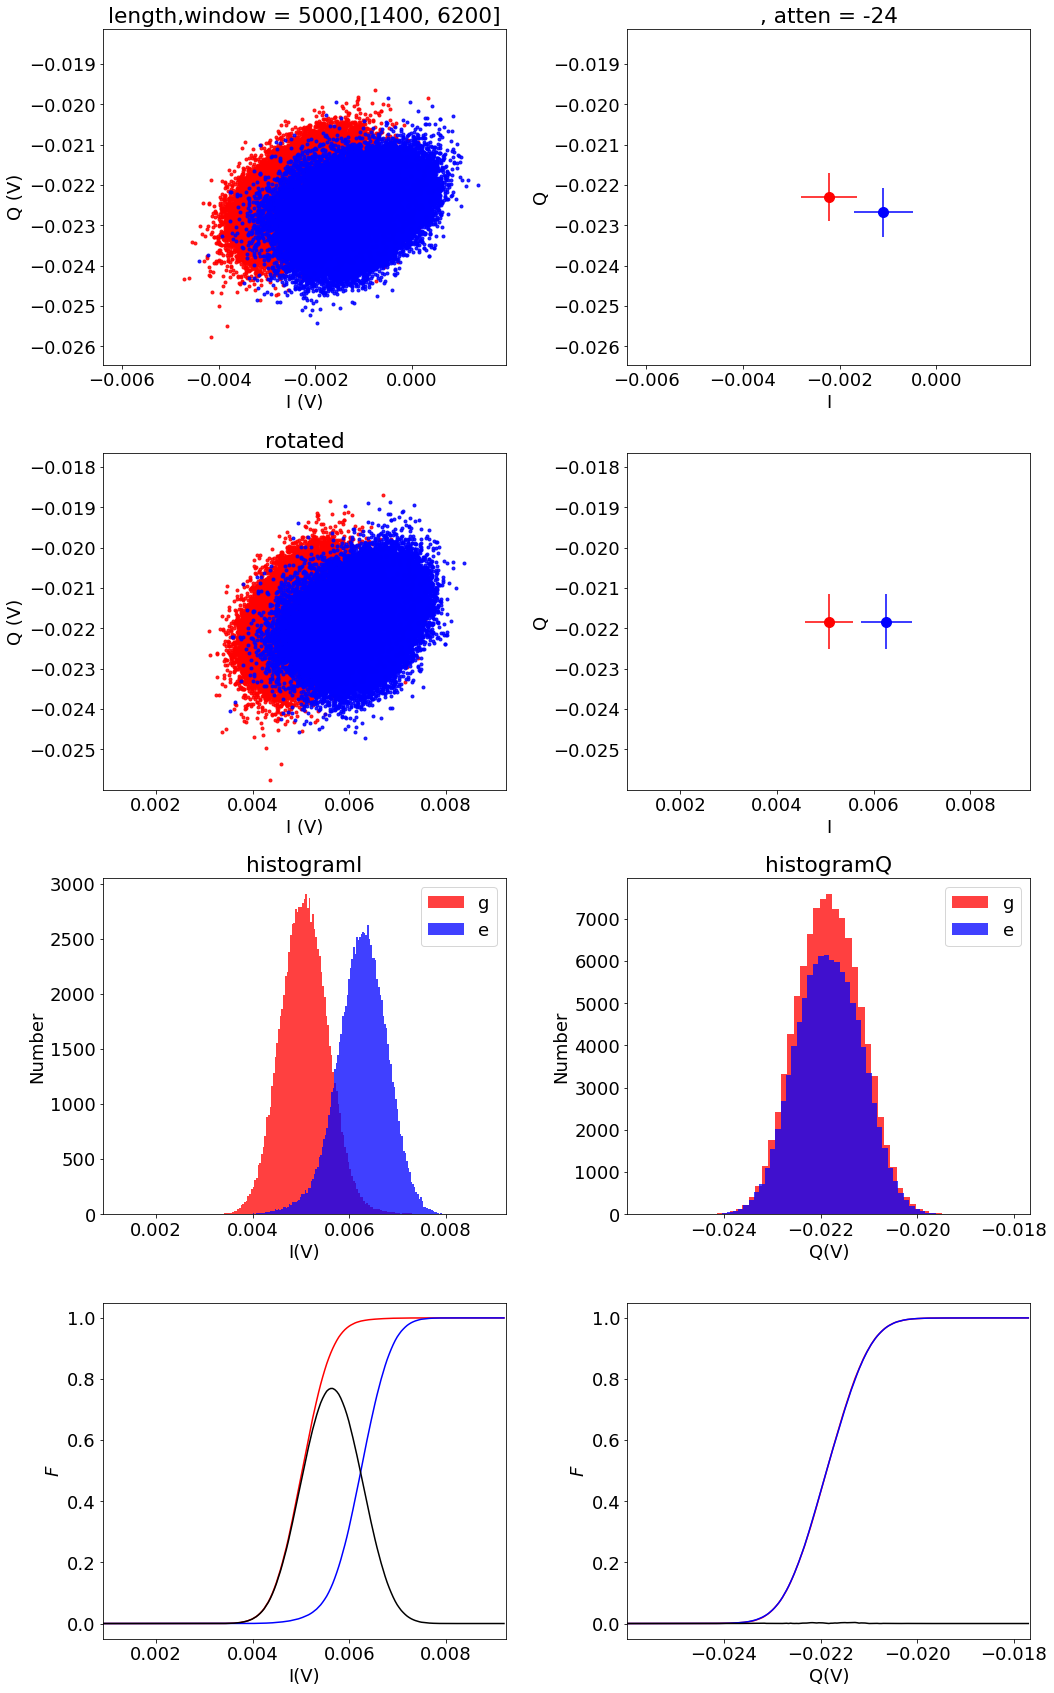

In [2]:
expt_name = 'histogram'
filelist = [1051]

tags = ['','','']


skip_f = True
if skip_f:
    range_val = 2
else:
    range_val = 3
    
rancut = [30,30,30]
for jj,i in enumerate(filelist):
#     filename = "S:/_Data/2021-10-22 Multimode cooldown 16 with JPA as of 2022-05-04/data/"
    filename = str(i).zfill(5) + "_"+expt_name.lower()+".h5"

    with File(filename,'r') as a:

        hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
        experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
        quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
        ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range']

        expt_cfg = (json.loads(a.attrs['experiment_cfg']))[expt_name.lower()]
        numbins = expt_cfg['numbins']
        print (numbins)
        numbins = 200
        a_num = expt_cfg['acquisition_num']
        ns = expt_cfg['num_seq_sets']
        readout_length = quantum_device_cfg['readout']['length']
        window = quantum_device_cfg['readout']['window']
        atten = quantum_device_cfg['readout']['dig_atten']
        print ('Readout length = ',readout_length)
        print ('Readout window = ',window)
        print ("Digital atten = ",atten)
        print ("Readout freq = ",quantum_device_cfg['readout']['freq'])
        I = array(a['I'])
        Q = array(a['Q'])
        sample = a_num
        
        I,Q = I/2**15*ran,Q/2**15*ran
        
        colors = ['r','b','g']
        labels= ['g','e','f']
        titles=['I','Q']

        IQs = mean(I[::3],1),mean(Q[::3],1),mean(I[1::3],1),mean(Q[1::3],1),mean(I[2::3],1),mean(Q[2::3],1)
        IQsss = I.T.flatten()[0::3],Q.T.flatten()[0::3],I.T.flatten()[1::3],Q.T.flatten()[1::3], \
                I.T.flatten()[2::3],Q.T.flatten()[2::3]
        
        fig = plt.figure(figsize=(15,7*5))

        ax = fig.add_subplot(621,title= 'length,window = ' + str(readout_length) + ','+str(window))
        x0g,y0g  = mean(IQsss[0][::int(a_num/sample)]),mean(IQsss[1][::int(a_num/sample)])
        x0e,y0e  = mean(IQsss[2][::int(a_num/sample)]),mean(IQsss[3][::int(a_num/sample)])
        phi = arctan((y0e-y0g)/(x0e-x0g))
        for ii in range(range_val):
            ax.plot(IQsss[2*ii][:],IQsss[2*ii+1][:],'.',color = colors[ii],alpha=0.85)

        ax.set_xlabel('I (V)')
        ax.set_ylabel('Q (V)') 
        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
        

        ax = fig.add_subplot(622,title= tags[jj] + ', atten = ' + str(atten))
        
        for ii in range(range_val):
            ax.errorbar(mean(IQsss[2*ii]),mean(IQsss[2*ii+1]),xerr = std(IQsss[2*ii]),
                        yerr = std(IQsss[2*ii+1]),fmt = 'o',color=colors[ii],markersize=10)
        ax.set_xlabel('I')
        ax.set_ylabel('Q')

        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
    
        IQsssrot = (I.T.flatten()[0::3]*cos(phi) + Q.T.flatten()[0::3]*sin(phi),
                    -I.T.flatten()[0::3]*sin(phi) + Q.T.flatten()[0::3]*cos(phi),
                    I.T.flatten()[1::3]*cos(phi) + Q.T.flatten()[1::3]*sin(phi),
                            -I.T.flatten()[1::3]*sin(phi) + Q.T.flatten()[1::3]*cos(phi),
                           I.T.flatten()[2::3]*cos(phi) + Q.T.flatten()[2::3]*sin(phi),
                            -I.T.flatten()[2::3]*sin(phi) + Q.T.flatten()[2::3]*cos(phi))

        
        
        ax = fig.add_subplot(623,title= 'rotated')
        x0g,y0g  = mean(IQsssrot[0][:]),mean(IQsssrot[1][:])
        x0e,y0e  = mean(IQsssrot[2][:]),mean(IQsssrot[3][:])

        for ii in range(range_val):
            ax.plot(IQsssrot[2*ii][:],IQsssrot[2*ii+1][:],'.',color = colors[ii],alpha=0.85)

        ax.set_xlabel('I (V)')
        ax.set_ylabel('Q (V)') 
        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
        ax = fig.add_subplot(624)
        
        for ii in range(range_val):
            ax.errorbar(mean(IQsssrot[2*ii]),mean(IQsssrot[2*ii+1]),xerr = 
                        std(IQsssrot[2*ii]),yerr = std(IQsssrot[2*ii+1]),fmt = 'o',color=colors[ii],markersize=10)
        ax.set_xlabel('I')
        ax.set_ylabel('Q')

        ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        ax.set_ylim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        
        for kk in range(4):

            ax = fig.add_subplot(6,2,kk%2+5,title= expt_name + titles[kk%2] )
            ax.hist(IQsssrot[kk], bins=numbins ,alpha=0.75,color=colors[int(kk/2)],label = labels[int(kk/2)])
            ax.set_xlabel(titles[kk % 2] + '(V)')
            ax.set_ylabel('Number')
            ax.legend()
            if kk%2 == 0:
                ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
            else:
                ax.set_xlim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        

    
    for ii,i in enumerate(['I','Q']):
        sshg, ssbinsg = np.histogram(IQsss[ii], bins=numbins)
        sshe, ssbinse = np.histogram(IQsss[ii+2], bins=numbins)
        fid = np.abs(((np.cumsum(sshg) - np.cumsum(sshe)) / sshg.sum())).max()

        print ("Single shot readout fidility from channel ",i," = ",fid)
    print ('---------------------------')
    
    for ii,i in enumerate(['I','Q']):
        if ii is 0:lims = [x0g-ran/rancut[jj],x0g+ran/rancut[jj]]
        else:lims  = [y0g-ran/rancut[jj],y0g+ran/rancut[jj]]
        sshg, ssbinsg = np.histogram(IQsssrot[ii], bins=numbins,range =lims )
        sshe, ssbinse = np.histogram(IQsssrot[ii+2], bins=numbins,range =lims)
        fid = np.abs(((np.cumsum(sshg) - np.cumsum(sshe)) / sshg.sum())).max()

        print ("Single shot readout fidility from channel ",i," after rotation = ",fid)
        print ("Optimal angle =",phi)
    
        ax = fig.add_subplot(6,2,7+ii)
        ax.plot(ssbinse[:-1],cumsum(sshg)/sshg.sum(),color='r')
        ax.plot(ssbinse[:-1],cumsum(sshe)/sshg.sum(),color='b')
        ax.plot(ssbinse[:-1],np.abs(cumsum(sshe)-cumsum(sshg))/sshg.sum(),color='k')
        if ii == 0:
            ax.set_xlim(x0g-ran/rancut[jj],x0g+ran/rancut[jj])
        else:
            ax.set_xlim(y0g-ran/rancut[jj],y0g+ran/rancut[jj])
        ax.set_xlabel(titles[ii] + '(V)')
        ax.set_ylabel('$F$')
    print ('---------------------------')
    
    fig.tight_layout()

# Hardware parameters

In [3]:
readout_time_frac = 0.05
acq_num = 2000

# Extract statistics

In [4]:
gdatI = IQsssrot[0]
edatI = IQsssrot[2]

gmean_true = np.mean(gdatI)
emean_true = np.mean(edatI)

gvar_true = np.var(gdatI)
evar_true = np.var(edatI)

# Sampling function

In [5]:
# Simulate a measurement corresponding to when the qubit is in e; includes decay during readout
def sample_e_once(gmean, emean, gvar, evar, readout_time_frac):
    if np.random.uniform() < readout_time_frac:
        e_sample = np.random.normal(loc=gmean, scale=np.sqrt(gvar))
    else:
        e_sample = np.random.normal(loc=emean, scale=np.sqrt(evar))
    return e_sample


def sample_ge(acq_num, gmean, emean, gvar, evar, readout_time_frac):
    g_samples = np.random.normal(loc=gmean, scale=np.sqrt(gvar), size=acq_num)
    e_samples = []
    # Modeling readout decay
    for _ in range(acq_num):
        e_samples.append(sample_e_once(gmean, emean, gvar, evar, readout_time_frac))
    return g_samples, e_samples

0.005073599223631639 0.006200985854421757


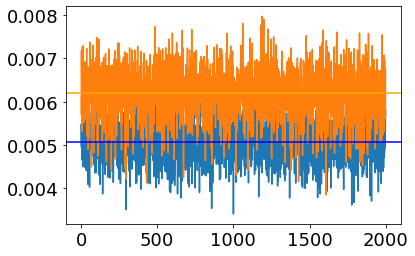

In [19]:
# Simulate the voltage values that will be assigned to the qubit g and e
g_samples, e_samples = sample_ge(acq_num, gmean_true, emean_true, gvar_true, evar_true, readout_time_frac)

gmean_sample = np.mean(g_samples)
emean_sample = np.mean(e_samples)
print(gmean_sample, emean_sample)

plt.plot(np.arange(len(g_samples)), g_samples)
plt.plot(np.arange(len(e_samples)), e_samples)
plt.axhline(gmean_sample, color='blue')
plt.axhline(emean_sample, color='orange')

# Simulate populations with error

In [23]:
expected_pop = 0.8

# measurement simulation with randomness
def measure_pop(acq_num, expected_pop, gmean, emean, gvar, evar, readout_time_frac):
    sample_results = []
    for _ in range(acq_num):
        if np.random.uniform() > expected_pop:
            sample_results.append(np.random.normal(loc=gmean, scale=np.sqrt(gvar)))
        else:
            sample_results.append(sample_e_once(gmean, emean, gvar, evar, readout_time_frac))
    return sample_results

pop_results = measure_pop(acq_num, expected_pop, gmean_true, emean_true, gvar_true, evar_true, readout_time_frac)


# scale raw voltage results to 0-1
def do_pi_calibration(gmean_sample, emean_sample, pop_results, return_on_avg=False):
    if return_on_avg:
        results = np.mean(pop_results)
    else:
        results = pop_results
    scaled_vals = (results - gmean_sample) / (emean_sample - gmean_sample)
    return scaled_vals

print("Expected:", expected_pop)
print("Error Simulated:", do_pi_calibration(gmean_sample, emean_sample, pop_results, return_on_avg=True))

Expected: 0.8
Error Simulated: 0.7724598576736142


In [24]:
include_q_pops = True

# Given expected cavity populations, outputs a simulated measurement based on the hardware parameters
# Takes as input the expected cavity populations; currently does not take expected qubit populations
def measure_pop_vector(acq_num, expected_pops, gmean_true, emean_true, gvar_true, evar_true, readout_time_frac,
                      gmean_sample, emean_sample, include_q_pops=False):
    sample_results_all = []
    for expected_pop in expected_pops:
        sample_results = measure_pop(acq_num, expected_pop, gmean_true, emean_true, 
                                     gvar_true, evar_true, readout_time_frac)
        sample_results_pi_cal = do_pi_calibration(gmean_sample, emean_sample, sample_results)
        sample_results_all.append(sample_results_pi_cal)
    if include_q_pops:
        # calculating g level from last 3 cavity levels, only appropriate for qubit in g (not given qubit populations
        # in the expected_pops variable)
#         if np.mean(np.mean(np.array(sample_results_all[-3:]), axis=0)) < 0:
#             sample_results_all.append(1 + np.mean(np.array(sample_results_all[-3:]), axis=0))
#             sample_results_all.append(-np.mean(np.array(sample_results_all[-4:-1]), axis=0))
#         else:  # if/else used to avoid having > 1 or < 0
#             sample_results_all.append(1 - np.mean(np.array(sample_results_all[-3:]), axis=0))
#             sample_results_all.append(np.mean(np.array(sample_results_all[-4:-1]), axis=0))
            
#         sample_results_all = sample_results_all[-2:] + sample_results_all[:-2]

        # given expected qubit population in expected_pops variable
        sample_results_all = sample_results_all[:1] + [1 - sample_results_all[0]] + sample_results_all[2:]
        # avoid having > 1 or < 0
        if np.mean(sample_results_all[0]) > 1:
            sample_results_all[0] /= np.mean(sample_results_all[0])
            sample_results_all = sample_results_all[:1] + [1 - sample_results_all[0]] + sample_results_all[2:]
        
    means = np.mean(sample_results_all, axis=1)
    covar = np.cov(sample_results_all, rowvar=True)
    return sample_results_all, means, covar

# qubit g population, qubit e population, then all cavity populations
test_vector = [0.7, 0.3, 0.9, 0.05, 0.039, 0.006, 0.0, 0.0, 0.005]
pop_results_vector, pop_results_mean, pop_results_cov = measure_pop_vector(acq_num, test_vector, gmean_true, 
                                                                           emean_true, gvar_true, evar_true, 
                                                                           readout_time_frac,
                                                                           gmean_sample, emean_sample,
                                                                           include_q_pops=include_q_pops)
print(pop_results_cov)
print(pop_results_mean)
print(np.sum(pop_results_mean) - 1)

[[ 4.76487476e-01 -4.76487476e-01  2.43185061e-02  9.73887848e-03
   3.14304079e-03  1.23088455e-02 -9.61266671e-03  6.72473534e-04
   2.98714053e-03]
 [-4.76487476e-01  4.76487476e-01 -2.43185061e-02 -9.73887848e-03
  -3.14304079e-03 -1.23088455e-02  9.61266671e-03 -6.72473534e-04
  -2.98714053e-03]
 [ 2.43185061e-02 -2.43185061e-02  3.54740237e-01  3.76237225e-04
  -1.14649273e-02  4.19903712e-03  4.26317622e-03 -3.08936944e-03
   1.90716521e-06]
 [ 9.73887848e-03 -9.73887848e-03  3.76237225e-04  2.38846452e-01
   5.54180578e-03  2.05390640e-03 -5.14214194e-04 -7.39202258e-04
   3.14462330e-03]
 [ 3.14304079e-03 -3.14304079e-03 -1.14649273e-02  5.54180578e-03
   2.43626837e-01  4.06665440e-03 -1.71846660e-03  3.08680977e-03
   1.01272764e-02]
 [ 1.23088455e-02 -1.23088455e-02  4.19903712e-03  2.05390640e-03
   4.06665440e-03  2.03647942e-01  1.80614697e-03 -3.32292327e-03
   6.45988320e-03]
 [-9.61266671e-03  9.61266671e-03  4.26317622e-03 -5.14214194e-04
  -1.71846660e-03  1.8061469

# Additional normalizations

In [25]:
# Compensate for normalizing total population to 1
if include_q_pops:
    norm_factor = np.sum(pop_results_mean[2:])
else:
    norm_factor = np.sum(pop_results_mean)
print(norm_factor)

# Carry out the normalizing on the mean vector and covariance matrix
pop_results_mean_norm = np.append(pop_results_mean[:2],  pop_results_mean[2:] / norm_factor)
pop_results_cov_norm = pop_results_cov / norm_factor**2
for j in range(2):  # g and e populations are not included in the normalizing of cavity populations to 1
    pop_results_cov_norm[:,j] *= norm_factor
    pop_results_cov_norm[j,:] *= norm_factor

    
# Compensate for taking absolute value of negative populations
neg_val_inds = np.where(pop_results_mean_norm < 0)
for ind in neg_val_inds:
    pop_results_mean_norm[ind] *= -1
    pop_results_cov_norm[:,ind] *= -1
    pop_results_cov_norm[ind,:] *= -1

0.9484433560722557


# Final Results

In [26]:
print(pop_results_mean_norm)
print(pop_results_cov_norm)

[0.68751694 0.31248306 0.9460688  0.04655084 0.02083482 0.00616071
 0.00288721 0.00806614 0.0036596 ]
[[ 4.76487476e-01 -4.76487476e-01  2.56404412e-02  1.02682763e-02
   3.31389405e-03 -1.29779447e-02  1.01352038e-02 -7.09028673e-04
   3.14951917e-03]
 [-4.76487476e-01  4.76487476e-01 -2.56404412e-02 -1.02682763e-02
  -3.31389405e-03  1.29779447e-02 -1.01352038e-02  7.09028673e-04
  -3.14951917e-03]
 [ 2.56404412e-02 -2.56404412e-02  3.94355275e-01  4.18252905e-04
  -1.27452543e-02 -4.66795776e-03 -4.73925948e-03  3.43436974e-03
   2.12014478e-06]
 [ 1.02682763e-02 -1.02682763e-02  4.18252905e-04  2.65519241e-01
   6.16067791e-03 -2.28327306e-03  5.71638227e-04  8.21751466e-04
   3.49579399e-03]
 [ 3.31389405e-03 -3.31389405e-03 -1.27452543e-02  6.16067791e-03
   2.70833467e-01 -4.52079140e-03  1.91037356e-03 -3.43152422e-03
   1.12582235e-02]
 [-1.29779447e-02  1.29779447e-02 -4.66795776e-03 -2.28327306e-03
  -4.52079140e-03  2.26389995e-01  2.00784549e-03 -3.69400532e-03
  -7.181280